In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [151]:
data=pd.read_csv('Admission.csv')

In [152]:
data

,GPA,GMAT,Decision
0,2.96,596,admit
1,3.14,473,admit
2,3.22,482,admit
3,3.29,527,admit
4,3.69,505,admit
...,...,...,...
80,3.05,399,border
81,2.85,483,border
82,3.01,453,border
83,3.03,414,border


In [153]:
data.shape

(85, 3)

In [154]:
data.info

<bound method DataFrame.info of      GPA  GMAT Decision
0   2.96   596    admit
1   3.14   473    admit
2   3.22   482    admit
3   3.29   527    admit
4   3.69   505    admit
..   ...   ...      ...
80  3.05   399   border
81  2.85   483   border
82  3.01   453   border
83  3.03   414   border
84  3.04   446   border

[85 rows x 3 columns]>

In [155]:
missing=data.isnull().sum().sort_values(ascending=False)
missing[missing>0]


Series([], dtype: int64)

In [157]:
cat=data.select_dtypes(include="object")
cat.columns

Index(['Decision'], dtype='object')

In [158]:
num=data.select_dtypes(include=["int64","float64"])
num.columns

Index(['GPA', 'GMAT'], dtype='object')

In [159]:
for x in num.columns:

 data[x]=data[x].fillna(data[x].mean())

In [161]:
for x in cat.columns:
  print(x)
  print("unique values are")
  print(data[x].unique())
  print("no of unique values",data[x].nunique())
  print("value counts")
  print(data[x].value_counts())
  print()

Decision
unique values are
['admit' 'notadmit' 'border']
no of unique values 3
value counts
admit       31
notadmit    28
border      26
Name: Decision, dtype: int64



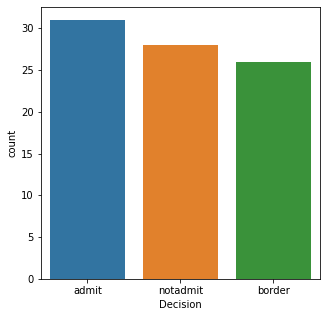

In [164]:
cat=data.select_dtypes(include="object")
L=[1,1,1]
a,b,c=L
fig=plt.figure(figsize=(5,5))
for x in cat:
  plt.subplot(a,b,c)
  sns.countplot(data[x])

  
  c=c+1


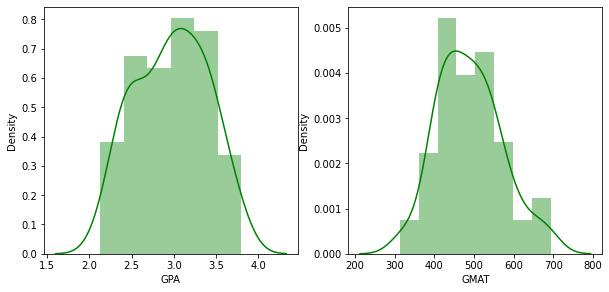

In [169]:
num=data.select_dtypes(include=["int64","float64"])
L=[2,2,1]
a,b,c=L
fig=plt.figure(figsize=(10,10))
for x in num:
  plt.subplot(a,b,c)
  sns.distplot(data[x],color="green")
  
  c=c+1

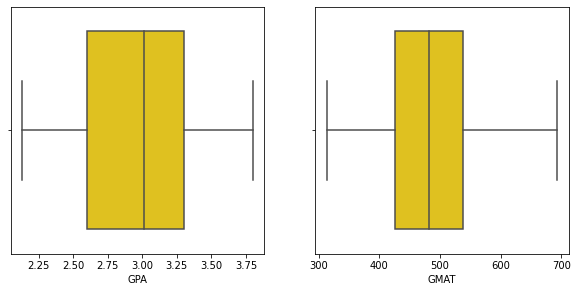

In [171]:
num=data.select_dtypes(include=["int64","float64"])
L=[2,2,1]
a,b,c=L
fig=plt.figure(figsize=(10,10))
for x in num:
  plt.subplot(a,b,c)
  sns.boxplot(data[x],color="gold")
  
  c=c+1

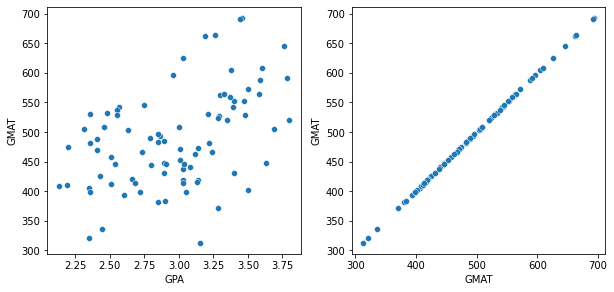

In [173]:
num=data.select_dtypes(include=["int64","float64"])
L=[2,2,1]
a,b,c=L
fig=plt.figure(figsize=(10,10))
for x in num:
  plt.subplot(a,b,c)
  sns.scatterplot(data[x],data['GMAT'])
  
  c=c+1

In [176]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
GPA,85.0,2.974588,0.428995,2.13,2.6,3.01,3.3,3.8
GMAT,85.0,488.447059,81.522347,313.00,425.0,482.00,538.0,693.0


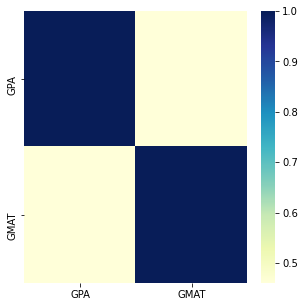

In [179]:
# plotting Heat map
corr=data.corr()
plt.subplots(figsize=(5,5))
sns.heatmap(corr ,cmap="YlGnBu",annot=False)

In [181]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
cat_data=data.select_dtypes(include='object')
for x in cat_data:
  data[x]=label.fit_transform(data[x].astype(str))

In [182]:
data

,GPA,GMAT,Decision
0,2.96,596,0
1,3.14,473,0
2,3.22,482,0
3,3.29,527,0
4,3.69,505,0
...,...,...,...
80,3.05,399,1
81,2.85,483,1
82,3.01,453,1
83,3.03,414,1


In [183]:
x=data.drop(['Decision'],axis=1)
y=data[['Decision']]

In [184]:
#import model to test the model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
x_train.shape, x_test.shape, y_test.shape,y_train.shape

((56, 2), (29, 2), (29, 1), (56, 1))

In [185]:
from xgboost import XGBClassifier
model_xgb=XGBClassifier()
model_xgb.fit(x_train,y_train)
xgb_predict=model_xgb.predict(x_test)
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix,classification_report
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=xgb_predict))
print(classification_report(y_test,xgb_predict))
confusion_matrix(y_test,xgb_predict)

accuracy score :
 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        11

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



array([[11,  0,  0],
       [ 0,  7,  0],
       [ 0,  0, 11]])

In [186]:
from sklearn.ensemble import RandomForestClassifier
model_RF=RandomForestClassifier()
model_RF.fit(x_train,y_train)
RF_predict=model_RF.predict(x_test)
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix,classification_report
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=RF_predict))
print(classification_report(y_test,RF_predict))
confusion_matrix(y_test,RF_predict)

accuracy score :
 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        11

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



array([[11,  0,  0],
       [ 0,  7,  0],
       [ 0,  0, 11]])

In [187]:
import lightgbm as lgb
model_lgb=lgb.LGBMClassifier()
model_lgb.fit(x_train,y_train)
lgb_predict=model_lgb.predict(x_test)
from sklearn.metrics import accuracy_score ,confusion_matrix 
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix,classification_report
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=lgb_predict))
print(classification_report(y_test,lgb_predict))
confusion_matrix(y_test,lgb_predict)

accuracy score :
 0.9655172413793104
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.86      0.92         7
           2       1.00      1.00      1.00        11

    accuracy                           0.97        29
   macro avg       0.97      0.95      0.96        29
weighted avg       0.97      0.97      0.96        29



array([[11,  0,  0],
       [ 1,  6,  0],
       [ 0,  0, 11]])

In [188]:
from sklearn.tree import DecisionTreeClassifier
model_DT= DecisionTreeClassifier()
model_DT.fit(x_train,y_train)
DT_predict=model_DT.predict(x_test)
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix,classification_report
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=DT_predict))
print(classification_report(y_test,DT_predict))
confusion_matrix(y_test,DT_predict)


accuracy score :
 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        11

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



array([[11,  0,  0],
       [ 0,  7,  0],
       [ 0,  0, 11]])

In [189]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=2, p=1,
                     weights='uniform')
model_KNN.fit(x_train,y_train)
KNN_predict=model_KNN.predict(x_test)
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix,classification_report
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=KNN_predict))
print(classification_report(y_test,KNN_predict))
confusion_matrix(y_test,KNN_predict)


accuracy score :
 0.5517241379310345
              precision    recall  f1-score   support

           0       0.69      0.82      0.75        11
           1       0.40      0.57      0.47         7
           2       0.50      0.27      0.35        11

    accuracy                           0.55        29
   macro avg       0.53      0.55      0.52        29
weighted avg       0.55      0.55      0.53        29



array([[9, 1, 1],
       [1, 4, 2],
       [3, 5, 3]])

In [190]:
from sklearn.ensemble import  AdaBoostClassifier
model_ab=AdaBoostClassifier()
model_ab.fit(x_train,y_train)
ab_predict=model_ab.predict(x_test)
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix,classification_report
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=ab_predict))
print(classification_report(y_test,ab_predict))
confusion_matrix(y_test,ab_predict)

accuracy score :
 0.7586206896551724
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        11
           1       0.00      0.00      0.00         7
           2       0.92      1.00      0.96        11

    accuracy                           0.76        29
   macro avg       0.52      0.67      0.58        29
weighted avg       0.59      0.76      0.66        29



array([[11,  0,  0],
       [ 6,  0,  1],
       [ 0,  0, 11]])

In [191]:
from sklearn.ensemble import  GradientBoostingClassifier
model_gb=GradientBoostingClassifier()
model_gb.fit(x_train,y_train)
gb_predict=model_gb.predict(x_test)
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix,classification_report
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=gb_predict))
print(classification_report(y_test,gb_predict))
confusion_matrix(y_test,gb_predict)

accuracy score :
 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        11

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



array([[11,  0,  0],
       [ 0,  7,  0],
       [ 0,  0, 11]])

In [192]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
NB_predict=model.predict(x_test)
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix,classification_report
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=NB_predict))
print(classification_report(y_test,xgb_predict))
confusion_matrix(y_test,NB_predict)

accuracy score :
 0.9655172413793104
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        11

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



array([[10,  1,  0],
       [ 0,  7,  0],
       [ 0,  0, 11]])

In [194]:
from sklearn import svm
model_svm = svm.SVC()
model_svm.fit(x_train, y_train)
svm_predict=model_svm.predict(x_test)
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix,classification_report
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=svm_predict))
print(classification_report(y_test,svm_predict))
confusion_matrix(y_test,svm_predict)

accuracy score :
 0.5517241379310345
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       0.41      1.00      0.58         7
           2       0.00      0.00      0.00        11

    accuracy                           0.55        29
   macro avg       0.39      0.61      0.46        29
weighted avg       0.38      0.55      0.44        29



array([[9, 2, 0],
       [0, 7, 0],
       [3, 8, 0]])